In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
plt.style.use("fivethirtyeight")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.agg(['sum', 'min', 'max', 'skew'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
sum,397386.0,342.000000,2057.000000,"Braund, Mr. Owen HarrisCumings, Mrs. John Brad...",malefemalefemalefemalemalemalemalemalefemalefe...,21205.170000,466.000000,340.000000,A/5 21171PC 17599STON/O2. 31012821138033734503...,28693.949300
min,1.0,0.000000,1.000000,"Abbing, Mr. Anthony",female,0.420000,0.000000,0.000000,110152,0.000000
max,891.0,1.000000,3.000000,"van Melkebeke, Mr. Philemon",male,80.000000,8.000000,6.000000,WE/P 5735,512.329200
skew,0.0,0.478523,-0.630548,NaN,NaN,0.389108,3.695352,2.749117,NaN,4.787317


In [6]:
train.shape

(891, 12)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[]

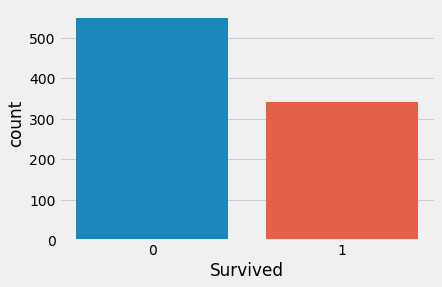

In [8]:
sns.countplot(x = 'Survived', data = train)
plt.plot()

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


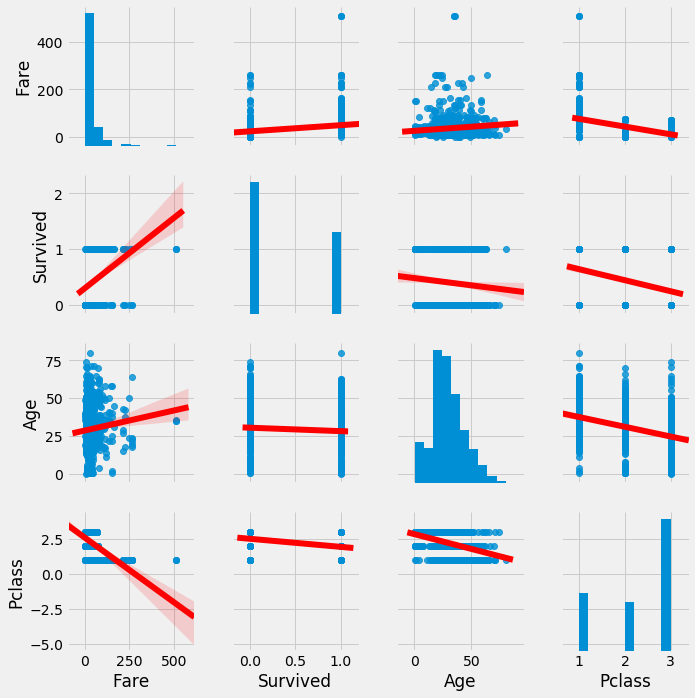

In [9]:
sns.pairplot(train[['Fare', 'Survived', 'Age', 'Pclass']], kind='reg', plot_kws={'line_kws':{'color':'red'}})

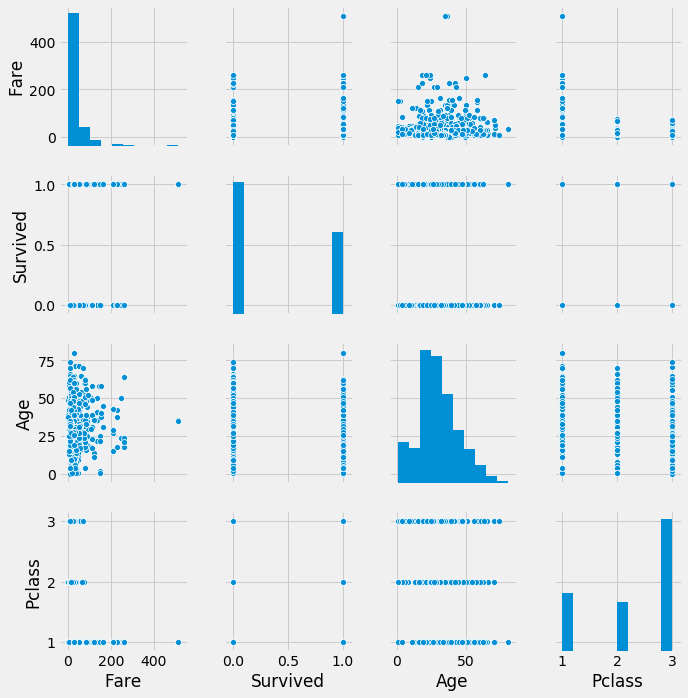

In [10]:
sns.pairplot(train[['Fare', 'Survived', 'Age', 'Pclass']])

In [11]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

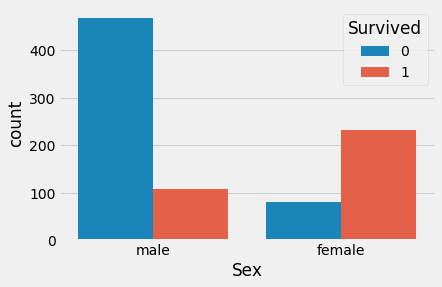

In [12]:
sns.countplot(x = 'Sex', hue='Survived', data = train)

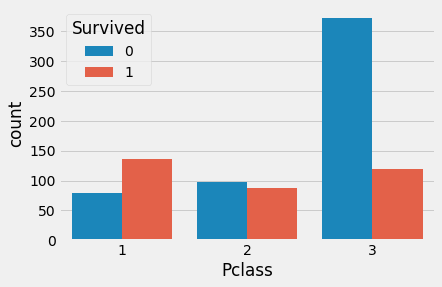

In [13]:
sns.countplot(x = 'Pclass', hue='Survived', data = train)

In [14]:
print(f"Minimum Age: {train['Age'].min()} \nMax Age: {train['Age'].max()} \nMean Age: {train['Age'].mean()}")

Minimum Age: 0.42 
Max Age: 80.0 
Mean Age: 29.69911764705882


In [15]:
pd.crosstab([train.Sex, train.Survived],train.Pclass, margins=True).style.background_gradient(cmap='summer_r')